<a href="https://colab.research.google.com/github/Noorulain234/Laptop-Scholarship/blob/main/LaptopScholarship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df=df.iloc[:,1:]

In [ ]:
import numpy as np
df = df.drop(columns=['placement'])
df['semester'] = np.random.randint(3, 9, size=len(df))
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['laptop'] = np.where((df['semester'] >= 3) & (df['semester'] <= 8) & (df['cgpa'] >= 5.5), 1, 0)
df.head()



,cgpa,iq,semester,%cgpa,laptop,gender
0,6.8,123.0,8,68.0,1,Male
1,5.9,106.0,8,59.0,1,Male
2,5.3,121.0,4,53.0,0,Male
3,7.4,132.0,5,74.0,1,Male
4,5.8,142.0,4,58.0,1,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cgpa      100 non-null    float64
 1   iq        100 non-null    float64
 2   semester  100 non-null    int64  
 3   %cgpa     100 non-null    float64
 4   laptop    100 non-null    int64  
 5   gender    100 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 4.8+ KB


In [ ]:
import matplotlib.pyplot as plt


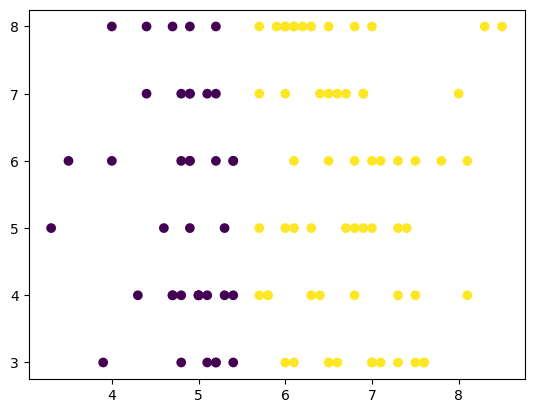

In [ ]:
plt.scatter(df['cgpa'],df['semester'],c=df['laptop'])

In [ ]:
X=df.iloc[:,2:4]
y=df.iloc[:,4]

In [ ]:
X

,semester,%cgpa
0,8,68.0
1,8,59.0
2,4,53.0
3,5,74.0
4,4,58.0
...,...,...
95,4,43.0
96,8,44.0
97,7,67.0
98,4,63.0


In [ ]:
y

,laptop
0,1
1,1
2,0
3,1
4,1
...,...
95,0
96,0
97,1
98,1


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,semester,%cgpa
92,3,52.0
38,7,65.0
64,5,70.0
29,8,70.0
40,6,49.0
...,...,...
48,7,66.0
88,7,44.0
0,8,68.0
97,7,67.0


In [ ]:
y_train

,laptop
92,0
38,1
64,1
29,1
40,0
...,...
48,1
88,0
0,1
97,1


In [ ]:
X_test

,semester,%cgpa
23,4,47.0
52,3,70.0
57,3,65.0
41,6,54.0
68,8,40.0
54,7,64.0
95,4,43.0
89,8,49.0
21,3,71.0
94,8,47.0


In [ ]:
y_test

,laptop
23,0
52,1
57,1
41,0
68,0
54,1
95,0
89,0
21,1
94,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()


In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.46860778, -0.7485326 ],
       [ 0.89165472,  0.40229939],
       [-0.28847653,  0.84492707],
       [ 1.48172035,  0.84492707],
       [ 0.3015891 , -1.01410921],
       [-1.46860778, -0.57148152],
       [-0.28847653,  0.57935046],
       [ 1.48172035, -1.45673689],
       [ 0.89165472, -1.10263474],
       [ 0.89165472,  0.75640153],
       [-0.87854215,  1.81870798],
       [-1.46860778,  0.04819724],
       [-0.28847653, -0.0403283 ],
       [-0.28847653,  1.11050368],
       [-0.87854215, -1.19116028],
       [-0.28847653,  0.75640153],
       [-0.87854215,  0.31377385],
       [-1.46860778,  1.11050368],
       [ 0.89165472,  0.75640153],
       [-0.28847653, -1.01410921],
       [ 0.3015891 ,  0.667876  ],
       [-0.87854215,  1.11050368],
       [ 0.3015891 , -1.10263474],
       [ 1.48172035,  0.13672277],
       [ 0.89165472, -1.01410921],
       [-0.28847653, -0.30590491],
       [-1.46860778, -0.83705813],
       [-1.46860778,  1.37608029],
       [ 1.48172035,

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
X_test

array([[-0.87854215, -1.19116028],
       [-1.46860778,  0.84492707],
       [-1.46860778,  0.40229939],
       [ 0.3015891 , -0.57148152],
       [ 1.48172035, -1.81083904],
       [ 0.89165472,  0.31377385],
       [-0.87854215, -1.54526243],
       [ 1.48172035, -1.01410921],
       [-1.46860778,  0.93345261],
       [ 1.48172035, -1.19116028]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_test

,laptop
23,0
52,1
57,1
41,0
68,0
54,1
95,0
89,0
21,1
94,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

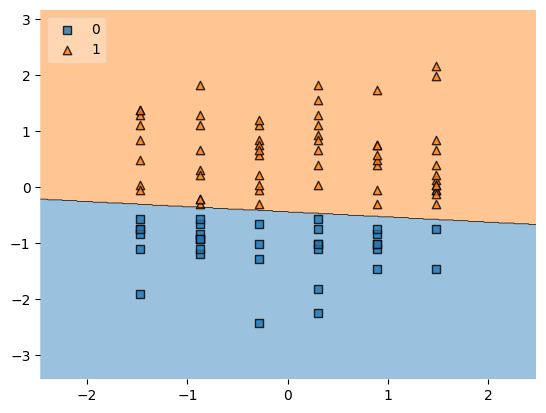

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('mode2.pkl','wb'))